## 1.<font color = '#C0392B'> Import Madules </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from platform import python_version
%matplotlib widget

In [2]:
print('Python: {}'.format(python_version()))
print('Numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))

Python: 3.9.7
Numpy: 1.19.5
matplotlib: 3.4.3


## 2.<font color = '#17A589'> Define Struct Class </font>

In [3]:
import copy as _copy

# Define struct class
class struct (dict):
    """
    A class to implement MATLAB-like structures
    """

    def __repr__(self):
        """
        String representation of the struct
        """
        return "struct({})".format(super().__repr__())


    def __getattr__(self, field):
        """
        Gets value of a field
        """
        if field not in dir(self):
            if field in self.keys():
                return self[field]
            else:
                return None
        else:
            return None


    def __setattr__(self, field, value):
        """
        Sets value of a field
        """
        if field not in dir(self):
            self[field] = value
        else:
            return super().__setattr__(field, value)


    def fields(self):
        """
        Gets the list of defined fields of the struct
        """
        return list(self.keys())


    def remove_field(self, field):
        """
        Removes a field from the struct
        """
        if field in self.keys():
            del self[field]


    def add_field(self, field, value = None):
        """
        Adds a new field to the struct
        """
        if field not in self.keys():
            self[field] = value


    def copy(self):
        """
        Creates a shallow copy of the struct
        """
        self_copy = struct()
        for field in self.keys():
            if isinstance(self[field], struct):
                self_copy[field] = self[field].copy()
            else:
                self_copy[field] = _copy.copy(self[field])

        return self_copy


    def deepcopy(self):
        """
        Creates a deep copy of the struct
        """
        self_copy = struct()
        for field in self.keys():
            if isinstance(self[field], struct):
                self_copy[field] = self[field].deepcopy()
            else:
                self_copy[field] = _copy.deepcopy(self[field])

        return self_copy


    def repeat(self, n):
        """
        Repeats/replicates the struct to create an array of structs (eg. for initialization)
        """
        return [self.deepcopy() for i in range(n)]



## 3.<font color = '#B7950B'> Define Timer Class </font>

In [4]:
import time

class TimerError(Exception):
    """A custom exception used to report errors in use of Timer class"""

class Timer:
    def __init__(self):
        self._start_time = None

    def start(self):
        """Start a new timer"""
        if self._start_time is not None:
            raise TimerError(f"Timer is running. Use .stop() to stop it")

        self._start_time = time.perf_counter()

    def stop(self):
        """Stop the timer, and report the elapsed time"""
        if self._start_time is None:
            raise TimerError(f"Timer is not running. Use .start() to start it")

        elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None
        print(f"Elapsed time: {elapsed_time:0.4f} seconds")

## 4.<font color = '#7D3C98'> Functions Definition </font>

In [5]:
def Ufun(x,a,k,m):
    o = k*((x-a)**m)*(x>a) + k*((-x-a)**m)*(x<(-a))
    return o

In [6]:
#F1
def F1(x):
    R = sum(x**2)
    return R
#F2
def F2(x):
    R = sum(np.abs(x))+np.prod(np.abs(x)) 
    return R
#F3
def F3(x):
    dim = len(x)
    R = 0
    for i in range(dim):
        R = R+sum(x[0:i])**2
    return R
#F4
def F4(x):
    R = np.max(np.abs(x))
    return R
#F5
def F5(x):
    dim = len(x)
    R = sum(100*(x[1:dim]-(x[0:dim-1]**2))**2 + (x[0:dim-1]-1)**2)
    return R
#F6
def F6(x):
    R = sum(np.abs(x+0.5)**2)
    return R
#F7
def F7(x):
    dim = len(x)
    R = sum(np.arange(1,dim+1)*(x**4)) + np.random.rand()
    return R
#F8
def F8(x):
    R = sum(-x*np.sin(np.sqrt(np.abs(x))))
    return R
#F9
def F9(x):
    dim = len(x)
    R = sum(x**2 - 10*np.cos(2*np.pi*x)) + 10*dim
    return R
#F10
def F10(x):
    dim = len(x)
    R = -20*np.exp(-0.2*np.sqrt(sum(x**2)/dim)) - np.exp(sum(np.cos(2*np.pi*x))/dim) + 20 + np.exp(1)
    return R
#F11
def F11(x):
    dim = len(x)
    R = sum(x**2)/4000 - np.prod(np.cos(x/np.sqrt(np.arange(1,dim+1)))) + 1
    return R
#F12
def F12(x):
    dim = len(x)
    R = (np.pi/dim)*(10*((np.sin(np.pi*(1+(x[0]+1)/4)))**2)+sum((((x[0:dim-1]+1)/4)**2)\
                    *(1+10*((np.sin(np.pi*(1+(x[1:dim]+1)/4))))**2))+((x[dim-1]+1)/4)**2)+sum(Ufun(x,10,100,4))
    return R
#F13
def F13(x):
    dim = len(x)
    R = 0.1*((np.sin(3*np.pi*x[0]))**2 + sum((x[0:dim-1]-1)**2 * (1+(np.sin(3*np.pi*x[1:dim]))**2))\
            +((x[dim-1]-1)**2)*(1+(np.sin(2*np.pi*x[dim-1]))**2))+sum(Ufun(x,5,100,4))
    return R

In [7]:
def Function_Name(Name):
    k = 30 # Dimentions of input variable, you can cahange the dimention from here.
    return{
        'F1': {
            'fitness': F1,
            'lower_bound':-100,
            'upper_bound':100,
            'dimensions':k
              },
        'F2': {
            'fitness': F2,
            'lower_bound':-10,
            'upper_bound':10,
            'dimensions':k
        } ,
        'F3': {
            'fitness': F3,
            'lower_bound':-100,
            'upper_bound':100,
            'dimensions':k 
        },
        'F4': {
            'fitness': F4,
            'lower_bound':-100,
            'upper_bound':100,
            'dimensions':k
        },
        'F5': {
            'fitness': F5,
            'lower_bound':-30,
            'upper_bound':30,
            'dimensions':k
        },
        'F6': {
            'fitness': F6,
            'lower_bound':-100,
            'upper_bound':100,
            'dimensions':k
        },
        'F7': {
            'fitness': F7,
            'lower_bound':-1.28,
            'upper_bound':1.28,
            'dimensions':k
        },
        'F8': {
            'fitness': F8,
            'lower_bound':-500,
            'upper_bound':500,
            'dimensions':k
        },
        'F9': {
            'fitness': F9,
            'lower_bound':-5.12,
            'upper_bound':5.12,
            'dimensions':k
        },
        'F10': {
            'fitness': F10,
            'lower_bound':-32,
            'upper_bound':32,
            'dimensions':k
        },
        'F11': {
            'fitness': F11,
            'lower_bound':-600,
            'upper_bound':600,
            'dimensions':k
        },
        'F12': {
            'fitness': F12,
            'lower_bound':-50,
            'upper_bound':50,
            'dimensions':k
        },
        'F13': {
            'fitness': F13,
            'lower_bound':-50,
            'upper_bound':50,
            'dimensions':k
        }
    }.get(Name, f'{Name} is not exist!' )

## 5.<font color = '#FF7F50'> Algorithm's parameters </font>

In [8]:
t = Timer()
t.start()

problem = Function_Name('F1')

nvar = problem['dimensions']
varmin = problem['lower_bound']
varmax = problem['upper_bound']
CostFunction = problem['fitness']

parameter = struct()
parameter.N = 30           # Number of search agents
parameter.Iter_Max = 500  # Maximum number of iterations
parameter.PS = 0.2       # Stallions Percentage 
parameter.PC = 0.13     # Crossover Percentage

gBest = np.zeros(nvar)  # Best values for position
gBestScore = np.inf     # Best values for cost
Convergence_curve = np.zeros(parameter.Iter_Max)

NStallion = int(np.ceil(parameter.PS*parameter.N)) # Stallions Number 
Nfoal = int(parameter.N - NStallion) # foals Number

# print(NStallion, Nfoal)

## 6.<font color = '#ACE200'> Create Initial Population </font>

In [9]:
Empty_for_foal = struct()
Empty_for_foal.position = None
Empty_for_foal.cost = None

foal = Empty_for_foal.repeat(Nfoal)
for i in range(Nfoal):
    foal[i].position = np.random.uniform(varmin,varmax,nvar)
    foal[i].cost = CostFunction(foal[i].position)
    if gBestScore > foal[i].cost:
        gBestScore = foal[i].cost
        gBest = foal[i].position
        

Empty_for_Stallion = struct()
Empty_for_Stallion.position = None
Empty_for_Stallion.cost = None
Empty_for_Stallion.Group = None


Stallion = Empty_for_Stallion.repeat(NStallion)
for j in range(NStallion):
    Stallion[j].position = np.random.uniform(varmin,varmax,nvar)
    Stallion[j].cost = CostFunction(Stallion[j].position)
    if gBestScore > Stallion[j].cost:
        gBestScore = Stallion[j].cost
        gBest = Stallion[j].position
    


# print(foal,end='\n\n')
# print(Stallion,end='\n\n')
# print(gBest,end='\n\n')
# print(gBestScore,end='\n\n')
print(parameter.Iter_Max , type(parameter.Iter_Max))

500 <class 'int'>


## 7. <font color="#00C5E2"> Category the foal and merging to Stallion </font>

In [10]:
NGroup = int(np.floor(Nfoal/NStallion))
for i in range(NStallion):
    Stallion[i].Group = foal[i*NGroup:(i+1)*NGroup]
    
# print(Stallion[0])
# print(NGroup)

## 8.<font color="#17A589"> Exchange Function </font>

In [11]:
# founction for exchange 

def exchange(Stallion):
    
    NStallion = len(Stallion)
    NGroup = int(len(Stallion[0].Group))
    Value_Stack = []
    
    for i in range(NStallion):
        for j in range(NGroup):
            Value_Stack.append(Stallion[i].Group[j].cost)

        value = np.amin(Value_Stack)
        index = np.argmin(Value_Stack)
        Value_Stack.clear()

        if value < Stallion[i].cost:

            bestgroup = Stallion[i].Group[index].deepcopy()

            Stallion[i].Group[index].position = Stallion[i].position
            Stallion[i].Group[index].cost = Stallion[i].cost

            Stallion[i].position = bestgroup.position
            Stallion[i].cost = bestgroup.cost
  
    return Stallion

In [12]:
# print(Stallion,end='\n\n')
Stallion = exchange(Stallion)
# print(Stallion,end='\n\n')

## 9. <font color="#16C300"> Selected Global best from Stallion </font>

In [13]:
minimum_index = []

for i in range(NStallion):
    minimum_index.append(Stallion[i].cost)
    
index = np.argmin(minimum_index)
WH = Stallion[index]
gBest = WH.position
gBestScore = WH.cost
Convergence_curve[0] = WH.cost
# print(minimum_index,end='\n\n')
# print(gBest,end='\n\n')
# print(gBestScore,end='\n\n')
# print(WH,end='\n\n')

## 10. <font color="#D000DA"> Sort the cost value of Groups for each row in Stallion </font>

In [14]:
def SortFunc(Stallion,RowNum):
    
    NGroup = int(len(Stallion[RowNum].Group))
        
    Value_Stack = []
    sorting = []
    
    for j in range(NGroup):
        Value_Stack.append(Stallion[RowNum].Group[j].cost)
    index = np.argsort(Value_Stack)
    for x in index:
        sorting.append(Stallion[RowNum].Group[x])
    for j in range(NGroup):
        Stallion[RowNum].Group[j] = sorting[j] 
        
    Value_Stack.clear()
    sorting.clear()
    
    return Stallion[RowNum]

## 11. <font color="#BD006D"> The original loop </font>

Iteration : 0 , Best Cost : 52266.74739300808
Iteration : 1 , Best Cost : 52266.74739300808
Iteration : 2 , Best Cost : 40697.21912144093
Iteration : 3 , Best Cost : 40697.21912144093
Iteration : 4 , Best Cost : 29012.003696124793
Iteration : 5 , Best Cost : 29012.003696124793
Iteration : 6 , Best Cost : 29012.003696124793
Iteration : 7 , Best Cost : 22126.463893203552
Iteration : 8 , Best Cost : 22126.463893203552
Iteration : 9 , Best Cost : 20739.511455158154
Iteration : 10 , Best Cost : 20093.170342029283
Iteration : 11 , Best Cost : 20093.170342029283
Iteration : 12 , Best Cost : 20093.170342029283
Iteration : 13 , Best Cost : 10349.928508209714
Iteration : 14 , Best Cost : 10349.928508209714
Iteration : 15 , Best Cost : 10349.928508209714
Iteration : 16 , Best Cost : 10349.928508209714
Iteration : 17 , Best Cost : 8672.714187671427
Iteration : 18 , Best Cost : 8672.714187671427
Iteration : 19 , Best Cost : 7299.74656465118
Iteration : 20 , Best Cost : 7039.821434721748
Iteration :

Text(0, 0.5, 'Convergence_curve')

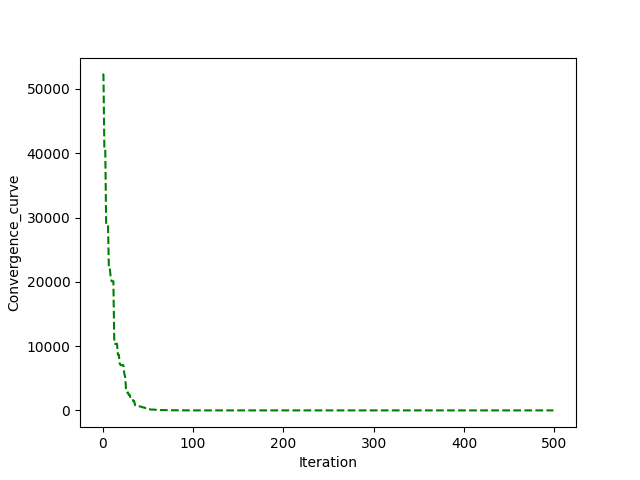

In [15]:
I = []
Iter = 1
while Iter<parameter.Iter_Max+1:
    TDR = 1-Iter*(1/parameter.Iter_Max)
    for i in range(NStallion):

        # sort the cost value of Groups for each row in Stallion
        Stallion[i] = SortFunc(Stallion,i)
        
        for j in range(NGroup):
            
            if np.random.rand() > parameter.PC:
                
                r1 = np.random.rand(nvar) < TDR
                r2 = np.random.rand()
                r3 = np.random.rand(nvar)
                idx = (r1 == 0)
                z = r2*idx + r3*~idx
                rr = -2+4*z # this variable is between -2 to 2
                
                Stallion[i].Group[j].position = 2*z*np.cos(2*np.pi*rr)\
                                                        *(Stallion[i].position-Stallion[i].Group[j].position)\
                                                        +(Stallion[i].position)
            else:
                
                A = np.random.permutation(NStallion)
                A = np.delete(A, A==i)
                a = A[0]
                b = A[1]
                
                x1 = Stallion[a].Group[-1].position
                x2 = Stallion[b].Group[-1].position
                y = (x1+x2)/2
                Stallion[i].Group[j].position = y
                
            Stallion[i].Group[j].position = np.minimum(Stallion[i].Group[j].position,varmax)
            Stallion[i].Group[j].position = np.maximum(Stallion[i].Group[j].position,varmin)
            Stallion[i].Group[j].cost = CostFunction(Stallion[i].Group[j].position)
            
        if np.random.rand() < 0.5:
            kk = 2*z*np.cos(2*np.pi*rr)*(WH.position - Stallion[i].position) + WH.position
        else:
            kk = 2*z*np.cos(2*np.pi*rr)*(WH.position - Stallion[i].position) - WH.position
        
        kk = np.minimum(kk,varmax)
        kk = np.maximum(kk,varmin)
        fk = CostFunction(kk)
        
        if fk < Stallion[i].cost:
            Stallion[i].position = kk
            Stallion[i].cost = fk
    
    Stallion = exchange(Stallion)
    valueWH = []
    for x in range(NStallion):
        valueWH.append(Stallion[x].cost)
    M1= np.argmin(valueWH)

    WH = Stallion[M1]
    gBest = WH.position
    gBestScore = WH.cost
    Convergence_curve[Iter-1] = WH.cost
    
    print(f"Iteration : {Iter-1} , Best Cost : {Convergence_curve[Iter-1]}")
    I.append(Iter-1)
    Iter+=1

print('\n'+ f"Best Position : {gBest}\n")


t.stop()       
plt.plot(I,Convergence_curve,"g--")
plt.xlabel('Iteration')
plt.ylabel('Convergence_curve')

